<a href="https://colab.research.google.com/github/hriteshMaikap/Hridaya-Cardiovascular-Disease-Prediction/blob/main/Hridaya_A_model_to_predict_Cardiovascular_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#A project that aims to detect heart disease using Machine Learning Algorithms

Importing Libraries and Dataset


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
heart_dataset = pd.read_csv('/content/cardiovascular disease data.csv')


Sample Data and other related Statistics


In [ ]:
#printing some data from cardiovascular disease data
print("The dataset contains",heart_dataset.shape[0],"rows and",heart_dataset.shape[1],"columns in it.\n\n")
print("The first 5 rows of the dataset is:")
print(heart_dataset.head())
print("\n\nThe last 5 rows of the dataset are:")
print(heart_dataset.tail())

#understanding the columns better
print("\n\n")
print("Lets understand the meaning of various columns:")
info = [
    "age",
    "1: male, 0: female",
    "chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic",
    "resting blood pressure",
    "serum cholestoral in mg/dl",
    "fasting blood sugar > 120 mg/dl",
    "resting electrocardiographic results (values 0-normal,1-minor irregularity,2-hypertrophy)",
    "maximum heart rate achieved",
    "exercise induced angina",
    "oldpeak = ST depression induced by exercise relative to rest",
    "the slope of the peak exercise ST segment",
    "number of major vessels (0-3) colored by flourosopy",
    "thal: 0 = normal; 1 = fixed defect; 2 = reversible defect"
]

for i in range(len(info)):
    print(heart_dataset.columns[i].ljust(10)+"-->" + info[i])


#some more info about the dataset
print("\n\n")
heart_dataset.info()

#some statistical methods on the dataset to get some more information
print("\n")
print(heart_dataset.describe())

#tells us about the number of people who have cardiovascular disease and who don't
print("\n")
target_counts = heart_dataset['target'].value_counts()
print(target_counts)

#finally lets check the correlation between the columns
print("\n")
print("This indicates how much is a data corelated to the target variable at a scale of 0 to 1 (data is arranged in descending order):")
print(heart_dataset.corr()["target"].sort_values(ascending=False))

#conclusions
text="""Some relevant conclusions from our dataset are as follows:
1. We have in total 1025 rows and 14 columns
2. No null data was found in the data set
3. In total 526 people were detected with heart disease and 499 were not
4. oldpeak or ST depression induced by exercise relative to rest was most related to the target variable
5. fbs or fasting blood sugar > 120 mg/dl is least correlated to the the target variable"""
print("\n\n")
print("\033[1m" + text + "\033[0m")

The dataset contains 1025 rows and 14 columns in it.


The first 5 rows of the dataset is:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


The last 5 rows of the dataset are:
      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
1020   59    1   1       140   221    0        1      164      1      0.0   
1021   60    1   0       125   258    0        0      141      1      2.8   
1022   47    1   0   

Visualising the data

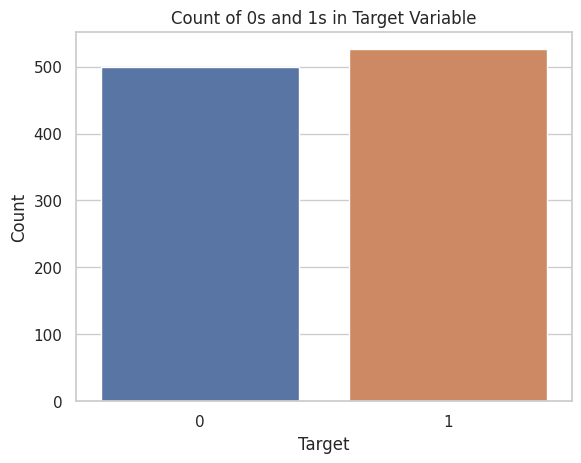

Clearly the data is balanced
1    526
0    499
Name: target, dtype: int64


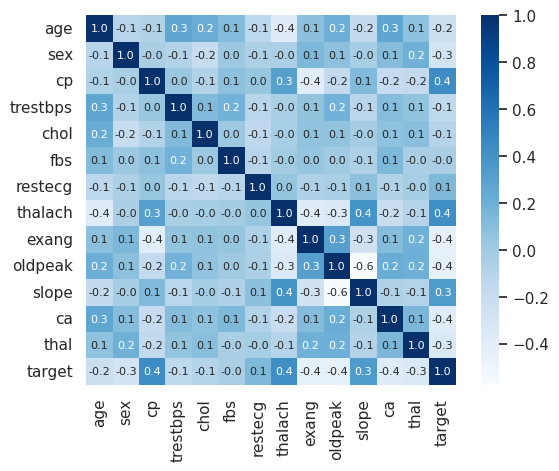

Unique values in the column of cp is:
[0 1 2 3]


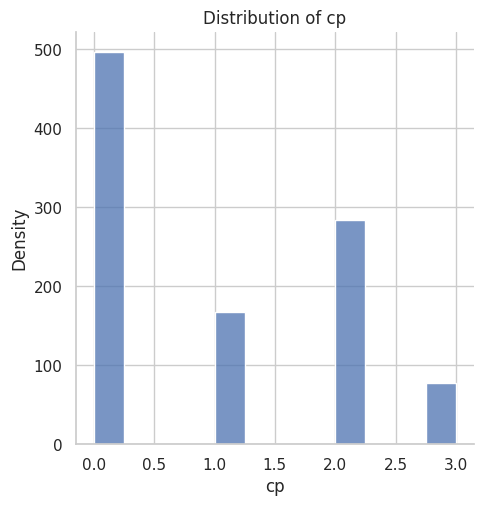

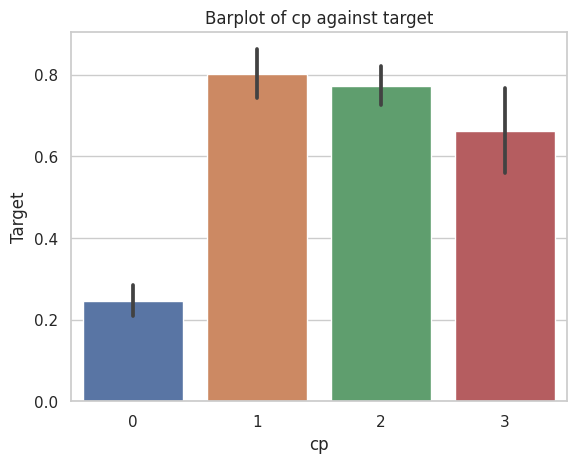

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Unique values in the column of fbs is:
[0 1]


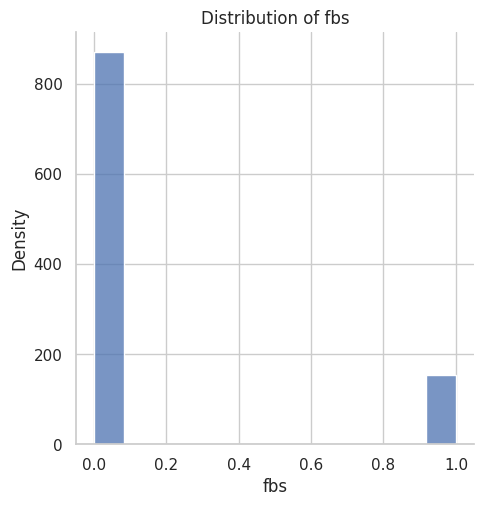

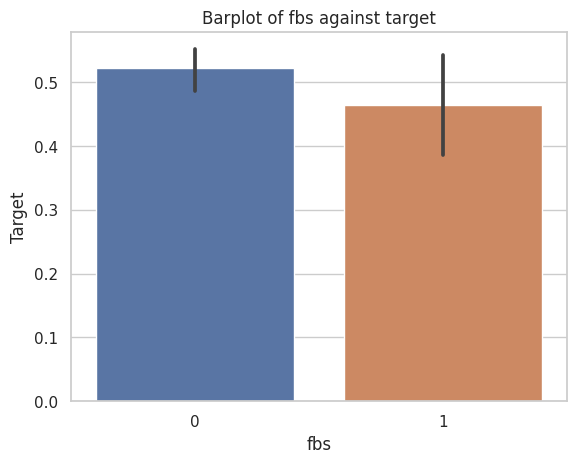

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Unique values in the column of restecg is:
[1 0 2]


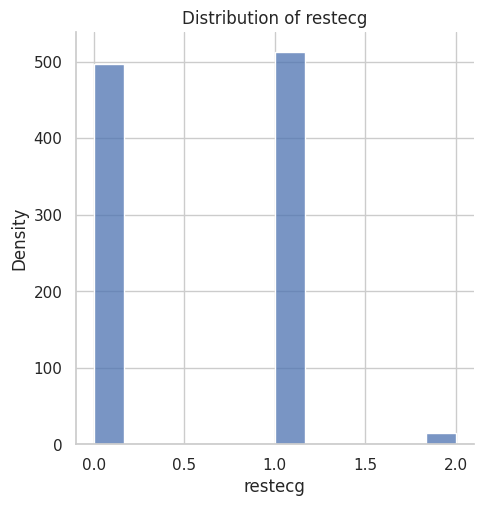

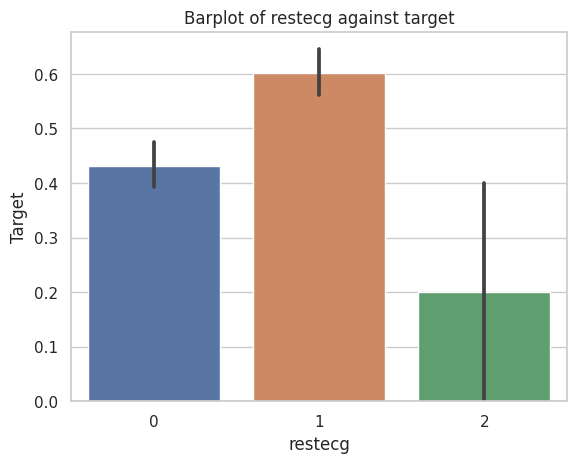

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Unique values in the column of exang is:
[0 1]


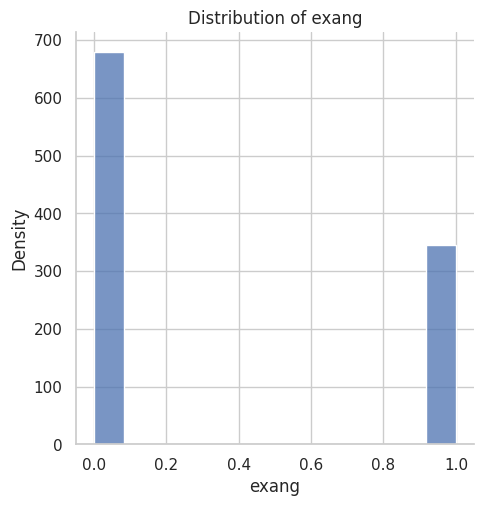

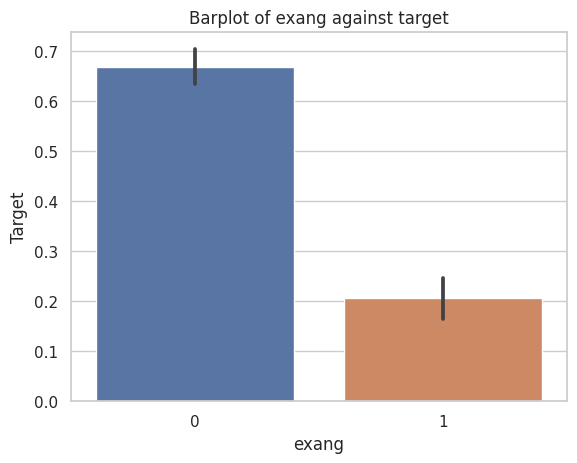

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Unique values in the column of slope is:
[2 0 1]


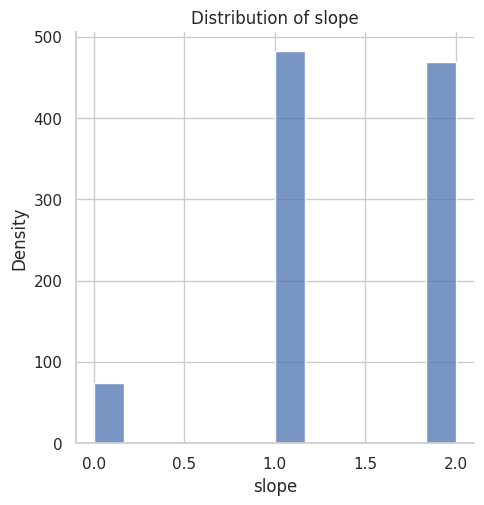

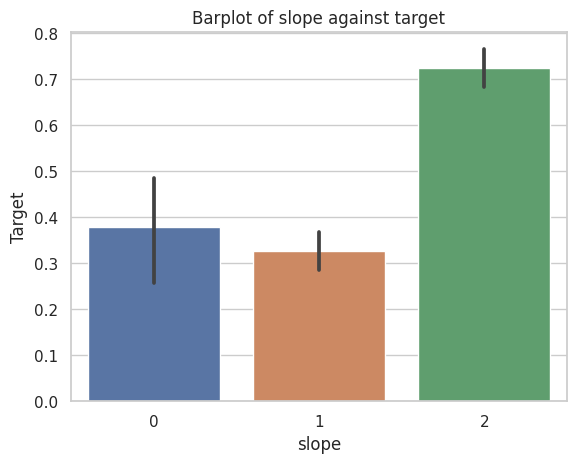

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Unique values in the column of ca is:
[2 0 1 3 4]


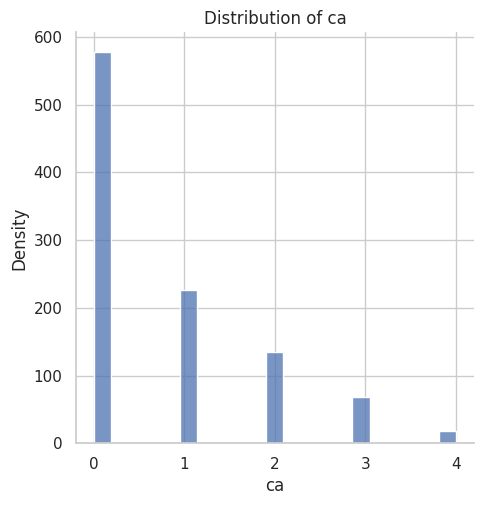

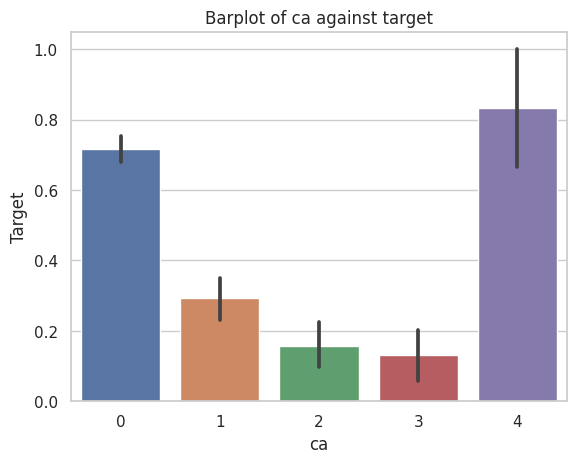

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
Unique values in the column of thal is:
[3 2 1 0]


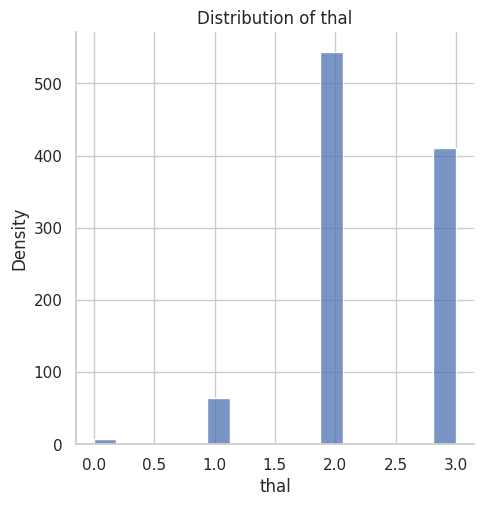

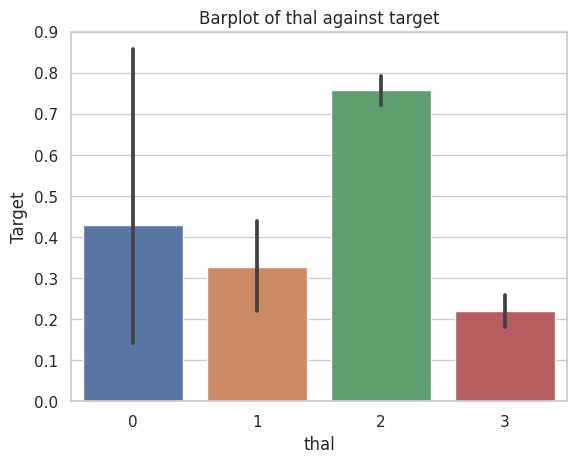

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

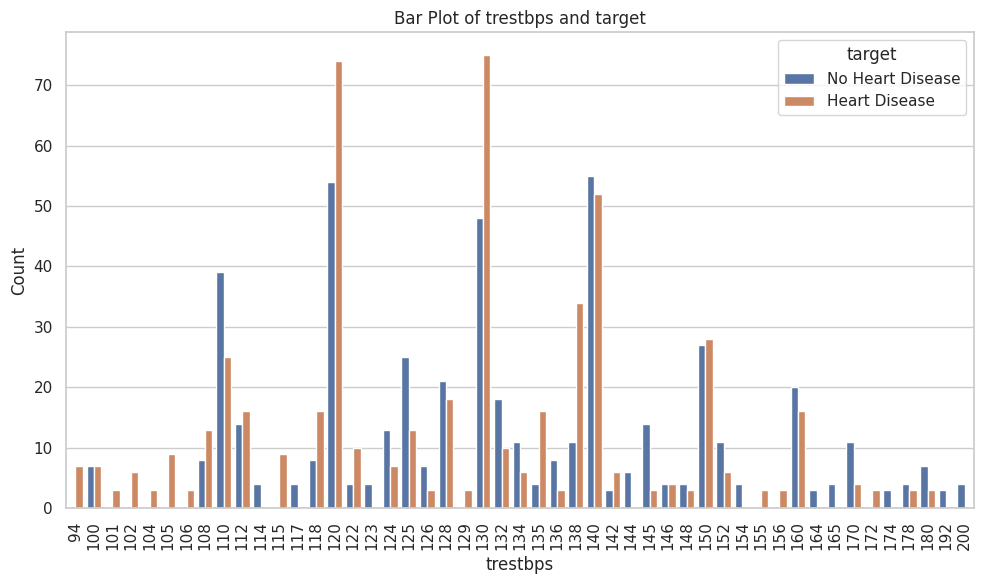

--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------


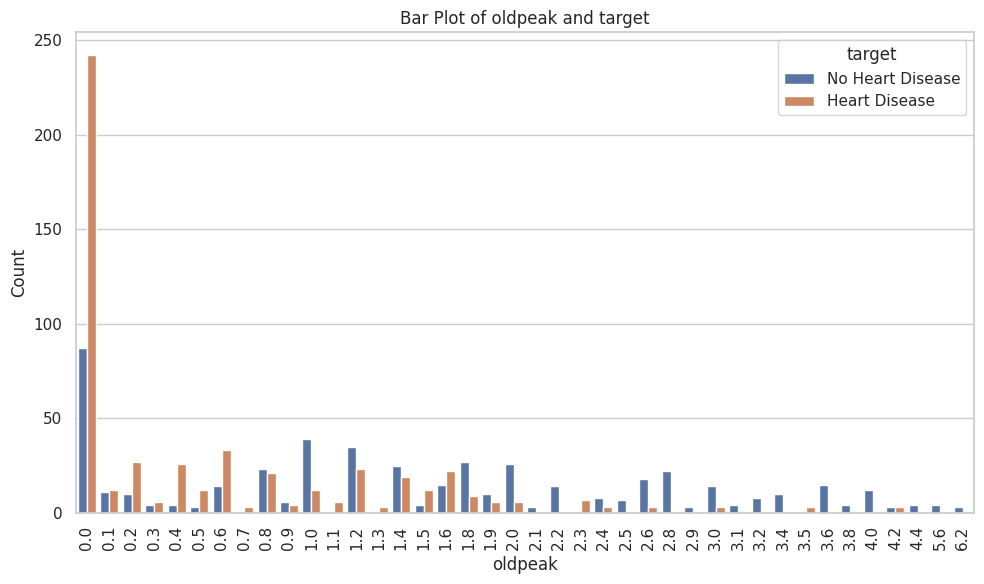

In [ ]:
#analysing the target variable
sns.countplot(x='target', data=heart_dataset)
plt.xlabel('Target')
plt.ylabel('Count')
plt.title('Count of 0s and 1s in Target Variable')
plt.show()
print("Clearly the data is balanced")
target_counts = heart_dataset['target'].value_counts()
print(target_counts)

print("="*500)

#heatmap
corr_matrix = heart_dataset.corr()
sns.heatmap(corr_matrix, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')
plt.show()

#Analysis of various features using displot and barplot
import seaborn as sns
import matplotlib.pyplot as plt

    # Define the list of features
features = ["cp", "fbs", "restecg", "exang", "slope", "ca", "thal"]

    # Loop through each feature
for feature in features:
    #unique numbers of the relevant columns
    print(f"Unique values in the column of {feature} is:")
    print(heart_dataset[feature].unique())

    # Distplot
    sns.displot(heart_dataset[feature])
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Density")
    plt.show()

    # Barplot
    sns.barplot(x=feature, y="target", data=heart_dataset)
    plt.title(f"Barplot of {feature} against target")
    plt.xlabel(feature)
    plt.ylabel("Target")
    plt.show()

    print("-"*500)

#special for trestbps
print("-"*500)
trestbps_unique = np.sort(heart_dataset['trestbps'].unique())
print(f"Unique values in the column 'trestbps' (sorted):")
print(trestbps_unique)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=heart_dataset, x='trestbps', hue='target')
plt.xlabel('trestbps')
plt.ylabel('Count')
plt.title('Bar Plot of trestbps and target')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.legend(title='target', labels=['No Heart Disease', 'Heart Disease'])
plt.tight_layout()  # Adjust plot layout for better spacing
plt.show()

#special for oldpeak
print("-"*500)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed
sns.countplot(data=heart_dataset, x='oldpeak', hue='target')
plt.xlabel('oldpeak')
plt.ylabel('Count')
plt.title('Bar Plot of oldpeak and target')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.legend(title='target', labels=['No Heart Disease', 'Heart Disease'])
plt.tight_layout()  # Adjust plot layout for better spacing
plt.show()

#pairplot



Splitting the dataset (Training and Testing)

In [ ]:
X = heart_dataset.iloc[:,:-1]
Y = heart_dataset.iloc[:, -1]
X_train, X_test, Y_train, Y_test =train_test_split(
  X, Y, test_size = 0.2, random_state = 24)

print(f"Train: {X_train.shape}, {Y_train.shape}")
print(f"Test: {X_test.shape}, {Y_test.shape}")

Train: (820, 13), (820,)
Test: (205, 13), (205,)


Machine Learning Model-1: Logistic Regression

In [ ]:
model = LogisticRegression(max_iter=1000) #max_iter=1000 prevents it from reaching till total number of iterations, in turn increasing accuracy.
model.fit(X_train, Y_train)
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy on Training data : ', training_data_accuracy)
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Training data :  0.85
Accuracy on Test data :  0.8585365853658536


Machine Learning Model-2: K-Nearest Neighbours

In [ ]:
k_values = range(1, 21)

best_accuracy = 0.0
best_k = 0

for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, Y_train)
    test_preds = knn_classifier.predict(X_test)
    accuracy = accuracy_score(Y_test, test_preds)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print("Best value of k: {}".format(best_k))
print("Accuracy with best k: {:.2f}%".format(best_accuracy * 100))



Best value of k: 29
Accuracy with best k: 98.54%


Machine Learning Model-3: Random Forest Classifiers

In [ ]:
from sklearn.ensemble import RandomForestClassifier

max_accuracy = 0


for x in range(2000):
    rf = RandomForestClassifier(random_state=x)
    rf.fit(X_train,Y_train)
    Y_pred_rf = rf.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_rf,Y_test)*100,2)
    if(current_accuracy>max_accuracy):
        max_accuracy = current_accuracy
        best_x = x

#print(max_accuracy)
#print(best_x)

rf_model = RandomForestClassifier(random_state=best_x)
rf_model.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
score_rf = round(accuracy_score(Y_pred_rf,Y_test)*100,2)

print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(Y_train, rf_model.predict(X_train))*100}")
print("The accuracy score achieved using Random Forest Classifier is: "+str(score_rf)+" %")

The accuracy score achieved using Decision Tree is: 100.0 %


Machine Learning Model-3: Random Forest Classifier

In [ ]:
rf_model = RandomForestClassifier(random_state=20)
rf_model.fit(X_train, Y_train)
preds = rf_model.predict(X_test)
print(f"Accuracy on train data by Random Forest Classifier\
: {accuracy_score(Y_train, rf_model.predict(X_train))*100}")

print(f"Accuracy on test data by Random Forest Classifier\
: {accuracy_score(Y_test, preds)*100}")

Accuracy on train data by Random Forest Classifier: 100.0
Accuracy on test data by Random Forest Classifier: 100.0


Machine Learning Model-4: Support Vector Machine

In [ ]:
sv_model = svm.SVC(kernel='linear', random_state=42)
sv_model.fit(X_train, Y_train)
sv_preds = sv_model.predict(X_test)
print(f"Accuracy on train data by SVM Classifier\
: {accuracy_score(Y_train, sv_model.predict(X_train))*100}")
print(f"Accuracy on test data by SVM Classifier\
: {accuracy_score(Y_test, sv_preds)*100}")

Accuracy on train data by SVM Classifier: 84.26829268292683
Accuracy on test data by SVM Classifier: 85.36585365853658


Machine Learning Model-5: Naive Bayes Classifier

In [ ]:
nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
nb_preds = nb_model.predict(X_test)
print(f"Accuracy on train data by Naive Bayes Classifier\
: {accuracy_score(Y_train, nb_model.predict(X_train))*100}")
print(f"Accuracy on test data by Naive Bayes Classifier\
: {accuracy_score(Y_test, nb_preds)*100}")

Accuracy on train data by Naive Bayes Classifier: 82.4390243902439
Accuracy on test data by Naive Bayes Classifier: 83.90243902439025


K-fold Cross Verification

Logistic Regression
Scores: [0.87378641 0.90291262 0.87378641 0.83495146 0.84466019 0.89215686
 0.80392157 0.83333333 0.78431373 0.80392157]
Mean Score: 0.8447744146202171
K-Nearest Neighbours
Scores: [1.         1.         1.         0.97087379 0.97087379 1.
 1.         1.         1.         1.        ]
Mean Score: 0.9941747572815534
Random Forest Classifier
Scores: [1.         1.         1.         1.         1.         1.
 1.         1.         0.97058824 1.        ]
Mean Score: 0.9970588235294118
Support Vector Machine
Scores: [0.85436893 0.90291262 0.87378641 0.82524272 0.86407767 0.87254902
 0.80392157 0.82352941 0.7745098  0.81372549]
Mean Score: 0.8408623643632211
Naive Bayes
Scores: [0.85436893 0.88349515 0.87378641 0.76699029 0.84466019 0.88235294
 0.76470588 0.78431373 0.75490196 0.80392157]
Mean Score: 0.821349704930516


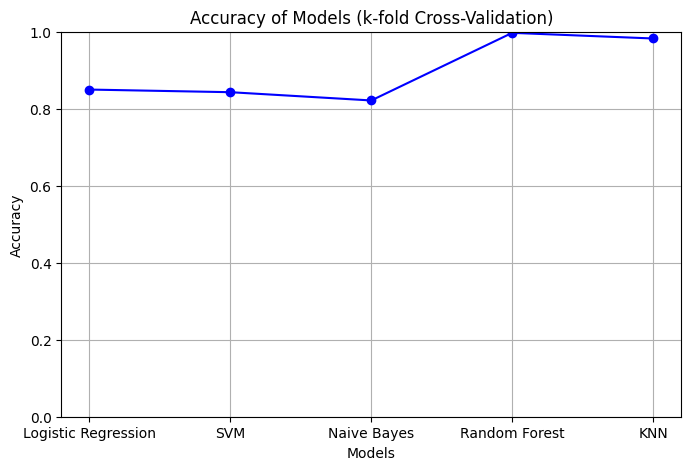

In [ ]:
#Scoring Metric
def cv_scoring(estimator, X, Y):
    return accuracy_score(Y, estimator.predict(X))
models = {"Logistic Regression":LogisticRegression(max_iter=1000),"K-Nearest Neighbours":KNeighborsClassifier(n_neighbors=1),
          "Random Forest Classifier":RandomForestClassifier(random_state=20),"Support Vector Machine":svm.SVC(kernel='linear', random_state=42),
          "Naive Bayes":GaussianNB()}
for model_name in models:
    model = models[model_name]
    scores = cross_val_score(model, X, Y, cv = 10,
                             n_jobs = -1,
                             scoring = cv_scoring)
    print("=="*30)
    print(model_name)
    print(f"Scores: {scores}")
    print(f"Mean Score: {np.mean(scores)}")

import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score

models = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest', 'KNN']
model_objects = [logreg_model, svm_model, nb_model, rf_model, knn_model]

k = 5  # Number of folds
accuracies = []
for model in model_objects:
    scores = cross_val_score(model, X, Y, cv=k)
    accuracies.append(scores.mean())

plt.figure(figsize=(8, 5))
plt.plot(models, accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models (k-fold Cross-Validation)')
plt.ylim([0.0, 1.0])
plt.grid(True)
plt.show()


Combination of all models to create a robust model

Logistic Regression Accuracy on Test data: 0.8585365853658536
SVM Accuracy on Test data: 0.8536585365853658
Naive Bayes Accuracy on Test data: 0.8390243902439024
Random Forest Accuracy on Test data: 1.0
KNN Accuracy on Test data: 0.9853658536585366
Accuracy on Test dataset by the combined model: 0.9121951219512195


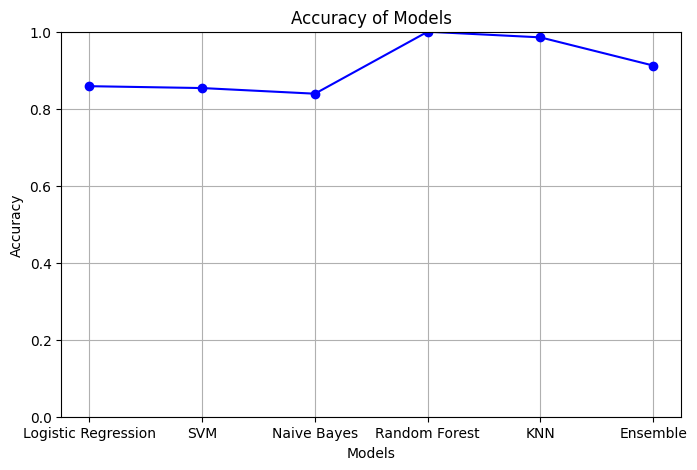

In [ ]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train, Y_train)
logreg_test_preds = logreg_model.predict(X_test)

svm_model = svm.SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, Y_train)
svm_test_preds = svm_model.predict(X_test)

nb_model = GaussianNB()
nb_model.fit(X_train, Y_train)
nb_test_preds = nb_model.predict(X_test)

rf_model = RandomForestClassifier(random_state=18)
rf_model.fit(X_train, Y_train)
rf_test_preds = rf_model.predict(X_test)

knn_model = KNeighborsClassifier(n_neighbors=1)
knn_model.fit(X_train, Y_train)
knn_test_preds = knn_model.predict(X_test)

final_preds = np.array([logreg_test_preds, svm_test_preds, nb_test_preds, rf_test_preds, knn_test_preds])
final_preds = np.apply_along_axis(lambda x: np.argmax(np.bincount(x)), axis=0, arr=final_preds)

logreg_test_accuracy = accuracy_score(logreg_test_preds, Y_test)
svm_test_accuracy = accuracy_score(svm_test_preds, Y_test)
nb_test_accuracy = accuracy_score(nb_test_preds, Y_test)
rf_test_accuracy = accuracy_score(rf_test_preds, Y_test)
knn_test_accuracy = accuracy_score(knn_test_preds, Y_test)
combined_accuracy = accuracy_score(Y_test, final_preds)

print("Logistic Regression Accuracy on Test data:", logreg_test_accuracy)
print("SVM Accuracy on Test data:", svm_test_accuracy)
print("Naive Bayes Accuracy on Test data:", nb_test_accuracy)
print("Random Forest Accuracy on Test data:", rf_test_accuracy)
print("KNN Accuracy on Test data:", knn_test_accuracy)
print("Accuracy on Test dataset by the combined model:", combined_accuracy)

import matplotlib.pyplot as plt

models = ['Logistic Regression', 'SVM', 'Naive Bayes', 'Random Forest', 'KNN', 'Ensemble']
accuracies = [logreg_test_accuracy, svm_test_accuracy, nb_test_accuracy, rf_test_accuracy, knn_test_accuracy, combined_accuracy]

plt.figure(figsize=(8, 5))
plt.plot(models, accuracies, marker='o', linestyle='-', color='blue')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Models')
plt.ylim([0.0, 1.0])
plt.grid(True)
plt.show()


Output for the model

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from statistics import mode
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

logreg_model = LogisticRegression(max_iter=1000)
svm_model = SVC(kernel='linear', random_state=42)
nb_model = GaussianNB()
knn_model = KNeighborsClassifier(n_neighbors=1)
rf_model = RandomForestClassifier(random_state=18)

def predict_heart_disease(age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal):
    input_data = [[age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal]]

    logreg_model.fit(X_train, Y_train)
    svm_model.fit(X_train, Y_train)
    nb_model.fit(X_train, Y_train)
    knn_model.fit(X_train, Y_train)
    rf_model.fit(X_train, Y_train)
    logreg_pred = logreg_model.predict(input_data)[0]
    svm_pred = svm_model.predict(input_data)[0]
    nb_pred = nb_model.predict(input_data)[0]
    knn_pred = knn_model.predict(input_data)[0]
    rf_pred = rf_model.predict(input_data)[0]

    final_pred = mode([logreg_pred, svm_pred, nb_pred, knn_pred, rf_pred])

    return final_pred

result = predict_heart_disease(49, 1, 1, 130, 266, 0, 1, 171, 0, 0.6, 2, 0, 2)
if (result==0):
  print("Cardiovasular Disease not detected!")
else:
  print("Cardiovasular Disease detected!")


Cardiovasular Disease detected!


Saving the trained model

In [ ]:
import pickle
from scipy.stats import mode
from sklearn.ensemble import VotingClassifier

final_model = VotingClassifier(estimators=[('logreg', logreg_model),
                                           ('svm', svm_model),
                                           ('nb', nb_model),
                                           ('knn', knn_model),
                                           ('rf', rf_model)],
                              voting='hard')
final_model.fit(X, Y)
filename = 'trained_model.sav'
pickle.dump(final_model, open(filename, 'wb'))

loaded_model = pickle.load(open('trained_model.sav', 'rb'))

input_data = [49, 1, 1, 130, 266, 0, 1, 171, 0, 0.6, 2, 0, 2]

standardScaler = StandardScaler()
standardScaler.fit(X_train)

input_data_scaled = standardScaler.transform([input_data])

prediction = loaded_model.predict(input_data_scaled)

input_data_scaled = standardScaler.transform([input_data])

logreg_pred = logreg_model.predict(input_data_scaled)
svm_pred = svm_model.predict(input_data_scaled)
nb_pred = nb_model.predict(input_data_scaled)
knn_pred = knn_model.predict(input_data_scaled)
rf_pred = rf_model.predict(input_data_scaled)

final_pred = mode([logreg_pred, svm_pred, nb_pred, knn_pred, rf_pred])[0][0]

if final_pred == 0:
    print('The person does not have a cardiovascular disease')
else:
    print('The person has a cardiovascular disease')


In [ ]:
import pickle
import numpy as np

loaded_model = pickle.load(open('trained_model.sav', 'rb'))

input_data = (49, 1, 1, 130, 266, 0, 1, 171, 0, 0.6, 2, 0, 2)

input_data_as_numpy_array = np.asarray(input_data)
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

prediction = loaded_model.predict(input_data_reshaped)

if prediction[0] == 0:
    print("Cardiovascular Disease not detected!")
else:
    print("Cardiovascular Disease detected!")


Cardiovascular Disease detected!
